<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"> · Minería de datos · PRAC 1</p>
<p style="margin: 0; text-align:right;">2022-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRAC 1: Selección y preparación de un juego de datos

Autor: Ángel Bujalance Gómez

En esta práctica he seleccionado una base de datos del repositorio: UCI Machine Learning (https://archive.ics.uci.edu/ml/datasets/heart+disease). El juego de datos que he seleccionado permite generar un modelo capaz de pronosticar el diagnóstico de enfermedades del corazón. En esta primera fase voy a tratar de preparar los datos para la fase del entrenamiento del modelo.

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv('heart_disease_uci.csv')

In [106]:
df.shape

(920, 16)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Estas dos últimas funciones proporcionan información general del dataset. Podemos ver que hay 920 observaciones y 16 variables distintas.

De estas, 8 son varaibles numericas, de las que 5 son variables con valores contínuos. Las 8 variables restantes son variables categóricas.

Podemos ver que algunas de estas variables tienen muchos atributos con valores nulos. Por ejemplo, la variable "ca" tiene 309 de 920 observaciones. 

Para más información sobre la base de datos, en la página de UCI ML tenemos la siguiente información:

* ID: Identificador único para cada paciente.
* Age: Edad en años.
* Origin: Lugar del estudio.
* Sex: sexo.
* cp: Síntoma correspondiente al tipo de dolor.
* trestbps: Presión sanguinea en reposo.
* chol: colesterol.
* fbs: si nivel de azúcar en ayunas > 120 mg/dl
* restecg: ECG resultados
* thalach: máximo nivel cardíaco conseguido
* exang: angina producida por ejercicio (Sí/No)
* oldpeak: depresión de ST por ejercicio
* slope: la pendiente de ST provocada por el ejercicio
* ca: número de vasos mayores (0-3)
* thal: tres valores: normal; fixed defect; reversible defect
* num: diagnóstico

In [108]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


Además, la variable "dataset" contiene información sobre el las instituciones que han colaborado en hacer este dataset. Esta variable no aporta información relevante sobre el diagnóstico de la enfermedad. Por lo tanto, será eliminada.

In [109]:
df = df.drop(columns=['dataset'])

In [110]:
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


La variable "num" es la variable que queremos predecir. 0 significa que la persona no tenía la enfermedad y valores más altos corresponden a diferentes etapas de la enfermedad.

De esta manera, he creado dos variables: una que corresponda al diagnóstico que indica si la persona está enferma o no. Y otra  que contenga el detalle de la etapa en la que se encuentra el paciente.

In [111]:
df = df.rename(columns={'num': 'stage'})
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [112]:
df['diagnosis'] = df['stage']
df.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,2
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


In [113]:
df['diagnosis'].loc[(df['diagnosis'] > 0)] = 1
df.head()

/var/folders/vc/dhymnk052dz8zs7gq81kypgw0000gn/T/ipykernel_32284/1414671565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'].loc[(df['diagnosis'] > 0)] = 1


,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,stage,diagnosis
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0


Voy a eliminar las variables 'ca' y 'thal' puesto que tienen demasiados valores nulos. Alrededor del 50% de los valores son nulos en esta variable.

In [114]:
df = df.drop(columns=['ca', 'thal', 'id'])

In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,stage,diagnosis
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,0


Voy a visualizar todas aquellas variables que contienen valores nulos:

In [116]:
df.isna().sum()[df.isna().sum() > 0] # show nan of cols with nan

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
dtype: int64

In [117]:
set(df.slope)

{'downsloping', 'flat', nan, 'upsloping'}

Primero de todo, voy a dividir los datos de manera que tenga un dataset de entrenamiento y otro de test para evaluar la capacidad del modelo. 

Para hacer la limpieza de los datos, voy a crear una serie de reglas en el dataset de entrenamiento. Estas reglas las aplicaré también en el dataset de test. En una situación real en la que tengamos missing data en la fase de entrenamiento, también la tendremos una vez el modelo haya sido desarrollado e implmentado a nivel de producción. Es por eso que hacer esta división de los datos va a favorecer tener una visión más real del rendimiento que el modelo va a tener en producción.

### Train - Test Split

In [118]:
X = df.drop(columns=['diagnosis', 'stage'])
y = df.diagnosis

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=23)

## Data Cleaning

First, I will clean the attributes in the train dataset. The same principles followed here, will be implemented to clean the data in the test set.

In [120]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
835,64,Male,asymptomatic,NaN,306.0,True,st-t abnormality,NaN,NaN,NaN,NaN
680,61,Male,non-anginal,200.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN
725,66,Male,non-anginal,120.0,0.0,False,st-t abnormality,120.0,False,-0.5,upsloping
564,52,Male,asymptomatic,112.0,342.0,False,st-t abnormality,96.0,True,1.0,flat
329,37,Male,asymptomatic,130.0,315.0,False,normal,158.0,False,0.0,NaN


In [121]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

trestbps     49
chol         24
fbs          73
restecg       1
thalch       46
exang        46
oldpeak      52
slope       254
dtype: int64

### Data Cleaning trestbps & Data Exploration

<AxesSubplot:>

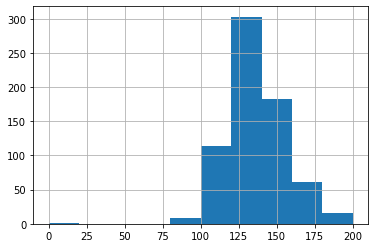

In [122]:
X_train.trestbps.hist()

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

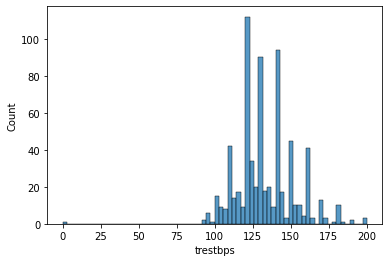

In [123]:
sns.histplot(X_train, x='trestbps', bins=70)

En este histograma se puede observar cómo los datos siguen una distribución normal, pero hay algunos valores más frecuentes. Esto puede ser porque algunos médicos tengan tendencia a asignar valores redondeados. 

En este caso, asumimos que la distribución es normal y asignaremos el valor medio a los valores nulos.

In [124]:
trestbps = X_train['trestbps'][X_train['trestbps'].notnull()].to_numpy().reshape(-1,1)

trestbps_mean = np.mean(trestbps)
print(trestbps_mean)

X_train['trestbps'] = X_train['trestbps'].fillna(trestbps_mean)

132.6448326055313


<AxesSubplot:xlabel='trestbps', ylabel='Count'>

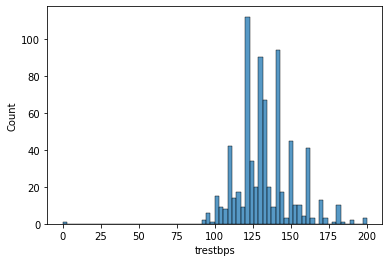

In [125]:
sns.histplot(X_train, x='trestbps', bins=70)

<AxesSubplot:>

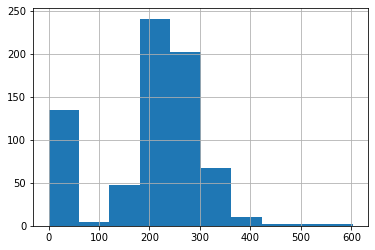

In [126]:
X_train.chol.hist()

### Data Cleaning Cholesterol & Data Exploration

<AxesSubplot:xlabel='chol', ylabel='Count'>

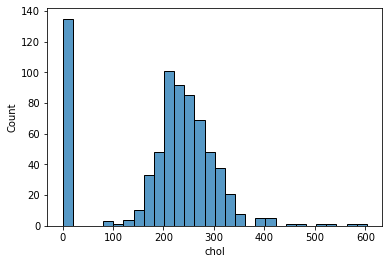

In [127]:
sns.histplot(X_train, x='chol', bins=30)

In [128]:
X_train.chol.head()

835    306.0
680      0.0
725      0.0
564    342.0
329    315.0
Name: chol, dtype: float64

En este caso, podemos categorizar los valores numéricos y discretizar esta variable en función del nivel de colesterol. Según criterios médicos, valores por debajo de 200 son niveles de colesterol adecuados para mantener una buena salud cardiovascular. Valores entre 200 y 239 son considerados de riesgo y de 240 o mayores son peligrosos.

En esta variable vuelven a ver missing values. Estos los substiuiré por la mediana. En este caso, aunque la mayor parte de los datos siguen una distribución normal, una parte de ellos están en otro "clúster". Es por eso por lo que en este caso no puedo asumir que los datos sean normales y prefiero substituir los valores por la mediana.

REFERENCES:

Cholesterol Numbers and What They Mean (https://my.clevelandclinic.org/health/articles/11920-cholesterol-numbers-what-do-they-mean)

In [129]:
chol = X_train['chol'][X_train['chol'].notnull()].to_numpy().reshape(-1,1)

chol_median = np.median(chol)

print(chol_median)

X_train['chol'] = X_train['chol'].fillna(chol_median)

225.0


<AxesSubplot:xlabel='chol', ylabel='Count'>

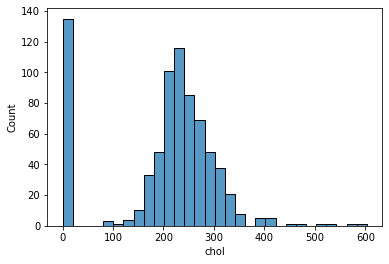

In [130]:
sns.histplot(X_train, x='chol', bins=30)

In [131]:
X_train.insert(4, "chol_cat", X_train['chol'])
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
835,64,Male,asymptomatic,132.644833,306.0,306.0,True,st-t abnormality,NaN,NaN,NaN,NaN
680,61,Male,non-anginal,200.000000,0.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN
725,66,Male,non-anginal,120.000000,0.0,0.0,False,st-t abnormality,120.0,False,-0.5,upsloping
564,52,Male,asymptomatic,112.000000,342.0,342.0,False,st-t abnormality,96.0,True,1.0,flat
329,37,Male,asymptomatic,130.000000,315.0,315.0,False,normal,158.0,False,0.0,NaN


In [132]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
835,64,Male,asymptomatic,132.644833,306.0,306.0,True,st-t abnormality,NaN,NaN,NaN,NaN
680,61,Male,non-anginal,200.000000,0.0,0.0,NaN,st-t abnormality,70.0,False,0.0,NaN
725,66,Male,non-anginal,120.000000,0.0,0.0,False,st-t abnormality,120.0,False,-0.5,upsloping
564,52,Male,asymptomatic,112.000000,342.0,342.0,False,st-t abnormality,96.0,True,1.0,flat
329,37,Male,asymptomatic,130.000000,315.0,315.0,False,normal,158.0,False,0.0,NaN


In [133]:
X_train['chol_cat'].loc[(X_train['chol'] < 240)] = 'risk'
X_train['chol_cat'].loc[(X_train['chol'] >= 240)] = 'danger'
X_train['chol_cat'].loc[(X_train['chol'] < 200)] = 'healthy'

/var/folders/vc/dhymnk052dz8zs7gq81kypgw0000gn/T/ipykernel_32284/1210862586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['chol_cat'].loc[(X_train['chol'] < 240)] = 'risk'


In [134]:
X_train.iloc[5:12]

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak,slope
441,53,Male,asymptomatic,130.000000,healthy,182.0,False,normal,148.0,False,0.0,NaN
326,37,Male,atypical angina,130.000000,danger,283.0,False,st-t abnormality,98.0,False,0.0,NaN
905,61,Male,non-anginal,132.644833,danger,284.0,False,normal,NaN,NaN,NaN,NaN
866,59,Male,asymptomatic,140.000000,danger,274.0,False,normal,154.0,True,2.0,flat
151,42,Female,asymptomatic,102.000000,danger,265.0,False,lv hypertrophy,122.0,False,0.6,flat
838,59,Male,asymptomatic,125.000000,risk,222.0,False,normal,135.0,True,2.5,downsloping
766,59,Male,asymptomatic,122.000000,risk,233.0,False,normal,117.0,True,1.3,downsloping


### Data Cleaning fbs & Data Exploration (I)

/Users/angel.bujalance/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/angel.bujalance/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot:xlabel='fbs', ylabel='Count'>

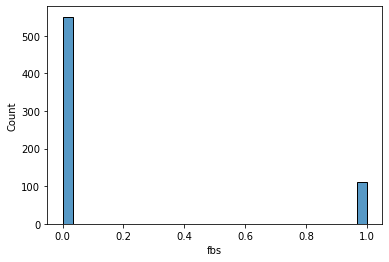

In [135]:
sns.histplot(X_train, x='fbs', bins=30)

En este caso se trata de un ejemplo de variable binaria. Para asignar los missing values, podríamos elaborar diferentes estrategias. Por ejemplo, podríamos asignar las instancias con valores perdidos a la categoría más frecuente. Otra alternativa es generar un modelo con el resto de valores y predecir los valores nulos. En este caso, voy a usar esta estrategia. Primero, voy a limpiar y asegurarme que no hay valores nulos en el resto de variables y después continuaré con la limpieza de esta variable.

En este caso, sólo quiero mostrar que se pueden utilizar modelos de Machine Learning durante la fase de limpieza de datos para predecir los valores nulos, pero no voy a centrarme en los aspectos formales de los modelos para mejorar su rendimiento.

### Data Cleaning restecg & Data Exploration

<AxesSubplot:xlabel='restecg', ylabel='Count'>

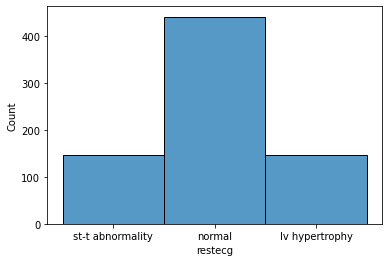

In [136]:
sns.histplot(X_train, x='restecg', bins=30)

En este caso, al haber un único valor nulo, voy a asignarlo a la categoría mayoritaria.

In [137]:
print(set(X_train.restecg))

X_train['restecg'] = X_train['restecg'].fillna('normal')

{nan, 'lv hypertrophy', 'st-t abnormality', 'normal'}


### Data Cleaning thalch & Data Exploration

<AxesSubplot:xlabel='thalch', ylabel='Count'>

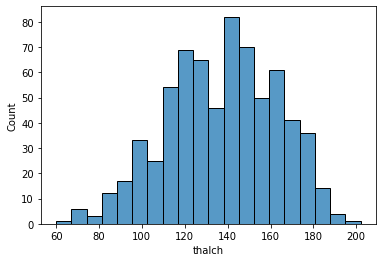

In [138]:
sns.histplot(X_train, x='thalch', bins=20)

De nuevo tenemos una variable numérica que sigue una distribución normal, en este caso voy a substituir los valores nulos por el valor medio.

In [139]:
thalch_mean = np.mean(X_train.thalch)
print(thalch_mean)

X_train['thalch'] = X_train['thalch'].fillna(thalch_mean)

137.3231884057971


### Data Cleaning exang & Data Exploration

/Users/angel.bujalance/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:461: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/Users/angel.bujalance/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:462: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


<AxesSubplot:xlabel='exang', ylabel='Count'>

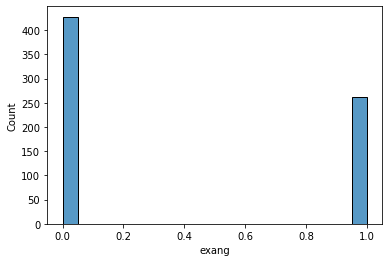

In [140]:
sns.histplot(X_train, x='exang', bins=20)

En este caso, voy a volver a utilizar el valor más frecuente para rellenar los NaN values.

In [141]:
print(set(X_train['exang']))
X_train['exang'] = X_train['exang'].fillna('False')

{nan, False, True}


### Data Cleaning oldpeak & Data Exploration

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

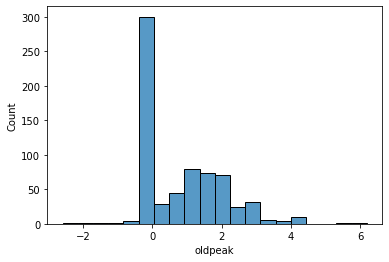

In [142]:
sns.histplot(X_train, x='oldpeak', bins=20)

De nuevo tenemos una variable numérica que no sigue distribución normal, en este caso voy a substituir los valores nulos por la mediana.

In [143]:
oldpeak = X_train['oldpeak'][X_train['oldpeak'].notnull()].to_numpy().reshape(-1,1)

oldpeak_median = np.median(oldpeak)
print(oldpeak_median)

X_train['oldpeak'] = X_train['oldpeak'].fillna(oldpeak_median)

0.5


### Data Cleaning slope & Data Exploration

<AxesSubplot:xlabel='slope', ylabel='Count'>

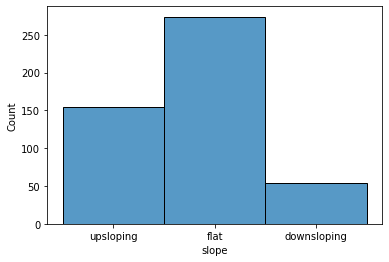

In [144]:
sns.histplot(X_train, x='slope', bins=20)

En este caso, al tratarse de muchos valores nulos, podemos simplemente eliminar este atributo. He decidido hacer esto porque utilizar otro método podía introducir mucho ruido en esta variable.

In [145]:
X_train = X_train.drop(columns=['slope'])

### Data Cleaning fbs & Data Exploration (II)

In [146]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

fbs    73
dtype: int64

In [147]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak
835,64,Male,asymptomatic,132.644833,danger,306.0,True,st-t abnormality,137.323188,False,0.5
680,61,Male,non-anginal,200.000000,healthy,0.0,NaN,st-t abnormality,70.000000,False,0.0
725,66,Male,non-anginal,120.000000,healthy,0.0,False,st-t abnormality,120.000000,False,-0.5
564,52,Male,asymptomatic,112.000000,danger,342.0,False,st-t abnormality,96.000000,True,1.0
329,37,Male,asymptomatic,130.000000,danger,315.0,False,normal,158.000000,False,0.0


Antes de esto vamos a tener que transformar los datos categoricos en variables dummies y normalizar los datos numéricos.

### Transformación de los datos

In [148]:
X_train_cat = X_train[['cp', 'sex', 'chol_cat', 'restecg', 'exang']]
X_train_cat.head()

,cp,sex,chol_cat,restecg,exang
835,asymptomatic,Male,danger,st-t abnormality,False
680,non-anginal,Male,healthy,st-t abnormality,False
725,non-anginal,Male,healthy,st-t abnormality,False
564,asymptomatic,Male,danger,st-t abnormality,True
329,asymptomatic,Male,danger,normal,False


In [149]:
X_train_num = X_train[['age', 'trestbps', 'thalch', 'oldpeak']]
X_train_num.head()

,age,trestbps,thalch,oldpeak
835,64,132.644833,137.323188,0.5
680,61,200.000000,70.000000,0.0
725,66,120.000000,120.000000,-0.5
564,52,112.000000,96.000000,1.0
329,37,130.000000,158.000000,0.0


In [150]:
X_train_cat_dum = pd.get_dummies(X_train_cat)
X_train_cat_dum.head()

,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
835,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
680,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
725,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
564,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
329,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0


In [151]:
# para normalizar los datos, puedo usar la siguiene función:

def norm_df(df: pd.DataFrame()):
    brain_norm = (df - df.mean())/df.std()
    return brain_norm

In [152]:
X_train_num_norm = norm_df(X_train_num)
X_train_num_norm.head()

,age,trestbps,thalch,oldpeak
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192


In [153]:
# junto de nuevo los datos categóricos y cuantitativos

X_train_cl = pd.merge(X_train_num_norm, X_train_cat_dum, left_index=True, right_index=True)
X_train_cl.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0


In [154]:
X_train_cl_fbs = pd.merge(X_train_cl, X_train['fbs'], left_index=True, right_index=True)
X_train_cl_fbs.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,fbs
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,True
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,NaN
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,False
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,False
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,False


In [155]:
X_train_cl_fbs.shape

(736, 20)

Ahora voy a dividir los datos en un test en el que están los valores nulos que vamos a intentar predecir y el resto de datos que nos servirán para predecir estos valores

In [156]:
X_pred_fbs = X_train_cl_fbs[X_train_cl_fbs['fbs'].isna()].iloc[:,:-1]
print(X_pred_fbs.shape)
X_pred_fbs.head()

(73, 19)


,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
680,0.780869,3.641894,-2.690305,-0.805192,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
615,-0.811446,-1.765106,-0.172759,-3.229000,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0
708,1.311640,1.208744,-1.891084,-0.805192,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
614,-0.917600,-1.224406,0.027046,-0.898415,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
685,0.780869,-0.143006,-2.410578,1.525393,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0


In [157]:
X_train_fbs = X_train_cl_fbs.dropna()
print(X_train_fbs.shape)
X_train_fbs.head()

(663, 20)


,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,fbs
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,True
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,False
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,False
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,False
441,-0.068366,-1.430061e-01,4.266566e-01,-0.805192,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,False


In [158]:
set(X_train_fbs)

{'age',
 'chol_cat_danger',
 'chol_cat_healthy',
 'chol_cat_risk',
 'cp_asymptomatic',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'exang_False',
 'exang_True',
 'fbs',
 'oldpeak',
 'restecg_lv hypertrophy',
 'restecg_normal',
 'restecg_st-t abnormality',
 'sex_Female',
 'sex_Male',
 'thalch',
 'trestbps'}

En este caso, voy a validar con un test muy pequeño. No quiero hacer el dataset de train excesivamente pequeño porque ya es la segunda partición de los datos y corro el riesgo de usar un dataset de entrenamiento excesivamente pequeño.

In [159]:
X = X_train_fbs.drop(columns=['fbs'])
y = X_train_fbs.fbs
y=y.astype('int') 

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.1, random_state=23)

In [160]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train2, y_train2)

In [161]:
y_pred = clf.predict(X_test2)

In [162]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf, X_train2, y_train2, cv=5)

confusion_matrix(y_train2, y_train_pred)

array([[491,   7],
       [ 93,   5]])

In [163]:
tn, fp, fn, tp = confusion_matrix(y_train2, y_train_pred).ravel()

prec = tp/(tp + fp)

print(f"La precisión del modelo es de {prec}")

La precisión del modelo es de 0.4166666666666667


Podemos ver que la precisión de este modelo es bastante baja. Los datos que estamos usando no están hechos para predecir la variable fbs. Por lo tanto, es previsible que estos resultados no sean especialmente buenos. 

Además, en este ejemplo quería mostrar cómo se pueden usar métodos más sofisticados para predecir el valor real de los valores nulos.

A continuación voy a predecir los valores nulos usando este modelo:

In [164]:
fbs_null = clf.predict(X_pred_fbs)

In [165]:
fbs_null

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

Ahora juntamos al dataset el array con los resultados predichos por el modelo. Excepto el primer valor nulo, el resto son False. Una vez tega esto, ya tendremos los datos perfectos para seguir en las próximas fases con la implementación de los modelos de Machine Learning.

Aún así, voy a reducir el número de dimensiones usando PCA o Singular Value Decomposition (SVD).

In [166]:
X_train_cl.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,chol_cat_danger,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0


In [167]:
X_train.loc[680, 'fbs'] = True

In [168]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

fbs    72
dtype: int64

In [169]:
X_train['fbs'] = X_train['fbs'].fillna(False)

In [170]:
X_train.isna().sum()[X_train.isna().sum() > 0] # show nan of cols with nan

Series([], dtype: int64)

In [171]:
X_train.head()

,age,sex,cp,trestbps,chol_cat,chol,fbs,restecg,thalch,exang,oldpeak
835,64,Male,asymptomatic,132.644833,danger,306.0,True,st-t abnormality,137.323188,False,0.5
680,61,Male,non-anginal,200.000000,healthy,0.0,True,st-t abnormality,70.000000,False,0.0
725,66,Male,non-anginal,120.000000,healthy,0.0,False,st-t abnormality,120.000000,False,-0.5
564,52,Male,asymptomatic,112.000000,danger,342.0,False,st-t abnormality,96.000000,True,1.0
329,37,Male,asymptomatic,130.000000,danger,315.0,False,normal,158.000000,False,0.0


In [172]:
set(X_train['fbs'])

{False, True}

In [173]:
#convertir fbs en una variable dummy
fbs_dum = pd.get_dummies(X_train['fbs'])

fbs_dum.head()

,False,True
835,0,1
680,0,1
725,1,0
564,1,0
329,1,0


In [174]:
X_tr = pd.concat([X_train_cl, fbs_dum], axis=1)
X_tr.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,...,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,False,True
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


### Aplicar PCA a los datos

Una vez he completado la etapa de limpieza de datos, puedo empezar a aplicar la PCA a la base de datos que he obtenido al final de todo el proceso.

Usando Singular Value Decomposition (SVD) podemos descomponer los datos en la operación de tres matrices distintas, donde cada vector de la matrix Vt corresponde a un componente principal. De manera que los primeros componentes son los que contienen más porcentaje de varianza explicada de los datos principales y los últimos los que menos. Es decir, los vectores de la matriz Vt están ordenados en función del orden de la varianza.

Primero vamos a obtener una matriz de correlaciones de los datos numéricos:

In [175]:
X_tr_num = X_tr.iloc[:,:4]
X_tr_num.head()

,age,trestbps,thalch,oldpeak
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192


In [176]:
X_tr_corr = X_tr_num.corr()

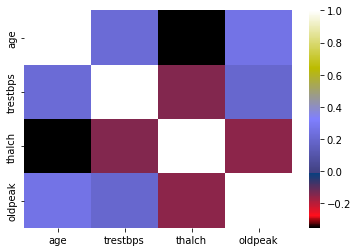

In [177]:
sns.heatmap(X_tr_corr, cmap="gist_stern")
plt.show()

In [178]:
U, s, Vt = np.linalg.svd(X_tr_corr) # svd

pc1 = Vt.T[:, 0] # primer componente de la PCA
pc1[:10]

array([-0.58397112, -0.43020989,  0.50646986, -0.46624613])

Una vez tenemos los componentes, podemos calcular la variabilidad que cada uno de ellos retiene.

Esto es útil para seleccionar el número de componentes que dejaremos para entrenar el modelo final. 

In [179]:
var_pc = []
val_pc = []

for i in range(0, len(s)):
    var_pci = sum(s[1:i]) / sum(s)
    pci_val = s[i] / sum(s)
    var_pc.append(var_pci)
    val_pc.append(pci_val)
    
print('Varianza explicada por las 4 Componentes:\n\n',
      val_pc[:4], '\n')

print('Varianza acumulada por las 4 Componentes:\n\n',
      var_pc[:4])

Varianza explicada por las 4 Componentes:

 [0.4179858702658142, 0.22401963963713098, 0.20185211789616905, 0.15614237220088573] 

Varianza acumulada por las 4 Componentes:

 [0.0, 0.0, 0.22401963963713098, 0.42587175753330003]


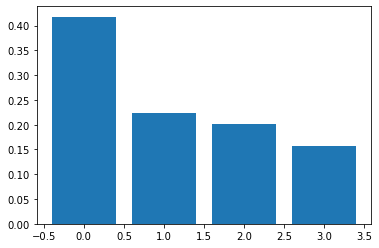

In [180]:
plt.plot()

plt.bar(np.linspace(0, 3, 4), val_pc)

plt.show()

### Seleccionar el Número de Componentes Principales 

Un método para seleccionar el número de Componentes Principales es el método de Káiser. Para esto se seleccionan los componentes que tienen un eigenvalue > 1. Este valor indica que el Componente Principal i representa más varianza que una de las variables originales. Este método sólo se puede llevar a cabo cuando los datos están estandarizados. 

Para hacer estos calculos necesitamos obtener los eigenvalues.

In [181]:
eigen_values, eigen_vectors = np.linalg.eig(X_tr_corr)

eigen_values[:4]

array([1.67194348, 0.62456949, 0.89607856, 0.80740847])

En este caso, tenemos que únicamente el primer componente principal tiene un valor de eigenvalue > 1 y también con el método del codo, vemos que el codo se produce con un único componente.

In [182]:
# selecciono el 1er componente

# 14 componentes principales

pc1 = Vt.T[:, 0:1]
pc1

array([[-0.58397112],
       [-0.43020989],
       [ 0.50646986],
       [-0.46624613]])

Una vez he seleccionado un único componente principal, 
voy a transformar la matriz orignal. Para hacerlo, voy a multiplicarla por el vector principal 1.

Para eso, es necesario que el número de columnas de la matrix de los datos originales sea igual al número de filas del vector.

Con la función shape, podemos ver si esta asunción se cumple y realizar la operación.

In [183]:
pc1.shape

(4, 1)

In [184]:
X_tr_num.shape

(736, 4)

In [185]:
# se cumple la asunción y reducimos la base de datos original

dat_red = X_tr_num.dot(pc1)
X_tr_num.head()

,age,trestbps,thalch,oldpeak
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192


Por último, agrego el dataset de datos categóricos y ya habremos acabado de preparar los datos de entrenamiento.

In [186]:
X_train_data = pd.concat([X_tr_num, X_tr.iloc[:,4:]], axis=1)
X_train_data.head()

,age,trestbps,thalch,oldpeak,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,sex_Female,sex_Male,...,chol_cat_healthy,chol_cat_risk,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True,exang_False,False,True
835,1.099331,7.683810e-15,-5.678807e-15,-0.339075,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
680,0.780869,3.641894e+00,-2.690305e+00,-0.805192,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
725,1.311640,-6.837062e-01,-6.922528e-01,-1.271309,0,0,1,0,0,1,...,1,0,0,0,1,1,0,0,1,0
564,-0.174520,-1.116266e+00,-1.651318e+00,0.127042,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
329,-1.766834,-1.430061e-01,8.262671e-01,-0.805192,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


Para generar un test set lo más realista posible, voy a utilizar las funciones del train set y las voy a aplicar en el test set.

Una vez el test set esté preprocesado, empezaré el proceso de modelado de datos. 

## Preprocesado de Test Set


## Aplicación de Modelos No Supervisados a los Datos

In [187]:
X_train_data.shape

(736, 21)

Aunque nos encontramos ante un problema de aprendizaje supervisado (predecir si a partir de unos atributos una persona va a presentar la enfermedad), puedo crear una categoria nueva a partir de las variables anteriores y ver si los algoritmos no supervisados son capaces de llegar a un resultado similar al del diagnóstico del personal médico sin utilizar etiquetas.

Para obtener el valor ideal de Clústers, voy a probar diferentes valores de K y ver cómo evoluciona la inertia:

In [188]:
from sklearn import cluster

def kmeans_sse(k:int, X):
    random.seed(42)

    kmeans = cluster.KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    return kmeans.inertia_



def plot_sse(X):
    K_vals = np.linspace(1,10,10).astype(int)
    sse_values =[]

    for ki in K_vals:
        sse_score = kmeans_sse(ki, X)

        sse_values.append(sse_score)

    return plt.plot(K_vals, sse_values)

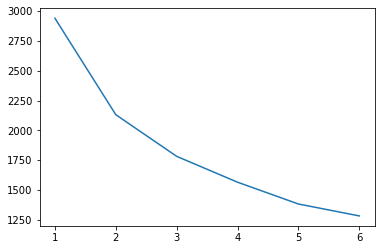

In [195]:
K_vals = np.linspace(1,6,6).astype(int)

sse_values =[]

for ki in K_vals:
    sse_score = kmeans_sse(ki, X_train_data.iloc[:,:4])

    sse_values.append(sse_score)

plt.plot(K_vals, sse_values)


La regla del codo nos dice que en el punto en el que se produce un codo es el número para escoger de k. En este caso, parece que se produce un codo en k=2. Por esta razón, voy a utilizar k=2 para dividir los datos de los clústers anteriores.

In [201]:
kmeans = cluster.KMeans(n_clusters=2, random_state=42).fit(X_train_data.iloc[:,:4])

diagn_labels = kmeans.labels_

confusion_matrix(y_train, diagn_labels)

array([[103, 226],
       [289, 118]])

A partir de la matriz de confusión se puede ver cómo el rendimiento del algoritmo de KMeans para este problema no está funcionando correctamente, y los dos clústers que ha formado tienen poco que ver con la presencia o ausencia de la enfermedad como se puede ver en la matriz de confusión. La diagonal principal se corresponde con las instancias clasificadas correctamente y se puede ver cómo la mayoría está fallando en la clasificación.

Por otro lado, tiene sentido el resultado porque no hay clústers en los datos. Es decir, la combinación de dos o varias varaibles no genera dos grupos diferenciados a una distancia y separables porque se encuentran a suficiente distancia unos clústers de otros. Como se puede ver en la siguiente figura, los datos cuantitivos forman un único clúster no separable.

<AxesSubplot:xlabel='age', ylabel='thalch'>

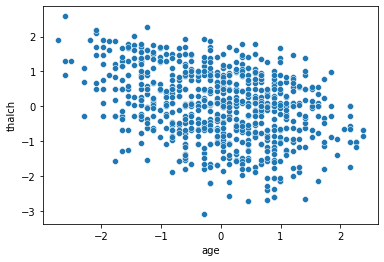

In [200]:
sns.scatterplot(data=X_train_data, x='age', y='thalch')

El siguiente modelo no supervisado es DBSCAN, que aunque no permite separar los datos porque no existen dos clusters separables a partir de estos datos, se puede emplear para detectar si hay outliers en los datos cuantitativos. 

<AxesSubplot:xlabel='age', ylabel='thalch'>

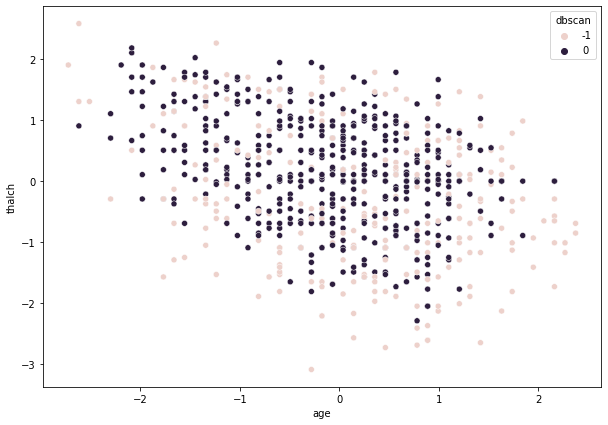

In [212]:
clustering = cluster.DBSCAN(eps=0.8, min_samples=15).fit(X_train_data.iloc[:,:4])

plt.figure(figsize=(10,7))

clusterdf = X_train_data

clusterdf['dbscan'] = clustering.labels_

sns.scatterplot(data=clusterdf, x='age', y='thalch', hue='dbscan')

In [ ]:
clustering = cluster.OPTICS(eps=0.8, min_samples=15).fit(X_train_data.iloc[:,:4])

plt.figure(figsize=(10,7))

clusterdf = X_train_data

clusterdf['dbscan'] = clustering.labels_

sns.scatterplot(data=clusterdf, x='age', y='thalch', hue='dbscan')

## Aplicación de Modelos Supervisados a los Datos